# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.

## Calculation

In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
from dask.distributed import Client

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

netcdf_index loaded.
Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
# cc.start_cluster()
client = Client()
client

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:33504 Dashboard: http://127.0.0.1:42372/status,Cluster Workers: 8 Cores: 8 Memory: 33.67 GB


In [3]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [4]:
input_path_obs = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

input_path_mod = '/g/data/e14/erd561/access-om2/'

In [8]:
trans_hov_LC_north_1 = xr.open_dataset(input_path_mod + 'trans_hov_LC_north_1.nc').trans_hov_LC_north_1/1e6/1036
print(trans_hov_LC_north_1)
trans_hov_LC_north_025 = xr.open_dataset(input_path_mod + 'trans_hov_LC_north_025.nc').trans_hov_LC_north_025/1e6/1036
print(trans_hov_LC_north_025)
trans_hov_LC_north_01 = xr.open_dataset(input_path_mod + 'trans_hov_LC_north_01.nc').trans_hov_LC_north_01/1e6/1036
print(trans_hov_LC_north_01)
trans_hov_LC_north_JRA = xr.open_dataset(input_path_mod + 'trans_hov_LC_north_JRA.nc').trans_hov_LC_north_JRA/1e6/1036
print(trans_hov_LC_north_JRA)

<xarray.DataArray 'trans_hov_LC_north_1' (year: 300, xt_ocean: 9)>
array([[-2.000973e-01,  2.202634e-02,  1.088795e-01, ..., -3.980831e-02,
        -2.101707e-02, -4.673802e-02],
       [-1.274816e-01, -2.499551e-01, -2.225101e-01, ..., -3.723093e-02,
        -2.038626e-02, -4.625198e-02],
       [ 1.263536e-01, -1.655035e-02, -1.173972e-01, ..., -6.428479e-02,
        -3.133784e-02, -7.031967e-02],
       ...,
       [-3.842200e-02, -7.510569e-02, -6.291742e-02, ..., -4.991187e-02,
        -3.766514e-02, -5.446197e-02],
       [ 5.277713e-02, -1.444774e-01, -2.188343e-01, ..., -5.572880e-02,
        -2.635136e-02, -5.722066e-02],
       [-5.411253e-02,  1.395241e-02, -1.187542e-04, ..., -4.931903e-02,
        -3.262001e-02, -7.049192e-02]], dtype=float32)
Coordinates:
  * year      (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
  * xt_ocean  (xt_ocean) float64 -249.5 -248.5 -247.5 ... -243.5 -242.5 -241.5
<xarray.DataArray 'trans_hov_LC_north_025' (year: 300, xt_oc

In [53]:
trans_LC_west_1 = xr.open_dataset(input_path_mod + 'trans_LC_west_1.nc').trans_LC_west_1/1e6/1036
print(trans_LC_west_1)
trans_LC_west_025 = xr.open_dataset(input_path_mod + 'trans_LC_west_025.nc').trans_LC_west_025/1e6/1036
print(trans_LC_west_025)
trans_LC_west_01 = xr.open_dataset(input_path_mod + 'trans_LC_west_01.nc').trans_LC_west_01/1e6/1036
print(trans_LC_west_01)
trans_LC_west_JRA = xr.open_dataset(input_path_mod + 'trans_LC_west_JRA.nc').trans_LC_west_JRA/1e6/1036
print(trans_LC_west_JRA)

<xarray.DataArray 'trans_LC_west_1' (year: 300)>
array([-2.19943 , -1.089398, -0.617018, ..., -1.333129, -1.110905, -1.822064],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_LC_west_025' (year: 300)>
array([-3.591102, -0.38703 , -5.767089, ..., -3.233292, -4.877006, -3.345691],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_LC_west_01' (year: 33)>
array([ -9.609508,  -6.600878,  -6.275089,  -5.92356 ,  -5.347267,  -6.761549,
        -2.92817 ,  -4.191974,  -2.432643,  -9.112196,  -5.810727,  -5.180137,
        -0.865439,  -3.595423,  -0.152698,  -5.355568,  -7.877318,  -4.153602,
        -0.878395,  -7.724507,  -4.50382 ,  -6.760833,  -5.952609,  -4.863941,
        -4.261293,  -2.122128,  -3.571357, -10.239137,  -8.480783,  -7.441834,
        -6.557172,  -5.256577,  -3.818563], dtype=float32)
Coordinates

In [55]:
trans_LC_south_1 = xr.open_dataset(input_path_mod + 'trans_LC_south_1.nc').trans_LC_south_1/1e6/1036
print(trans_LC_south_1)
trans_LC_south_025 = xr.open_dataset(input_path_mod + 'trans_LC_south_025.nc').trans_LC_south_025/1e6/1036
print(trans_LC_south_025)
trans_LC_south_01 = xr.open_dataset(input_path_mod + 'trans_LC_south_01.nc').trans_LC_south_01/1e6/1036
print(trans_LC_south_01)
trans_LC_south_JRA = xr.open_dataset(input_path_mod + 'trans_LC_south_JRA.nc').trans_LC_south_JRA/1e6/1036
print(trans_LC_south_JRA)

<xarray.DataArray 'trans_LC_south_1' (year: 300)>
array([ 1.797849, -0.001911, -0.051038, ...,  0.645085,  0.024904,  1.206133],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_LC_south_025' (year: 300)>
array([ 3.716515, -0.162569,  4.643129, ...,  2.470741,  3.836496,  2.082909],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_LC_south_01' (year: 33)>
array([ 6.866884,  4.469797,  3.863886,  2.949457,  4.505447,  3.763948,
        4.415128,  2.028834,  1.389415,  7.78924 ,  3.248237,  3.513138,
        0.925831,  0.933454, -2.235286,  2.647702,  5.566078,  3.264398,
       -1.236337,  6.049148,  2.306478,  5.364736,  2.515179,  1.665923,
        2.955884,  2.095062,  1.736599,  8.031561,  5.045964,  4.933429,
        3.818458,  3.313366,  1.934287], dtype=float32)
Coordinates:
  * year     (year) int64 19

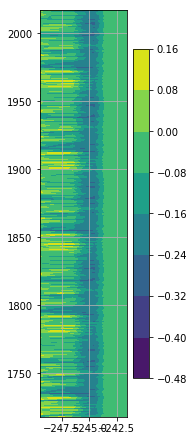

In [13]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=1
col=4

ax = plt.subplot(row, col, 1)
levels = 1
plt.contourf(trans_hov_LC_north_1.xt_ocean, trans_hov_LC_north_1.year, trans_hov_LC_north_1, label='IAF-1')
plt.colorbar()
plt.grid()
# plt.title('a) SST in Leeuwin Current sector', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# plt.legend(bbox_to_anchor=(1.0,1))
# ax.set_xticklabels('')
# plt.xlabel('Year')
# plt.ylabel('SST ($^{\circ}C$)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

# ax = plt.subplot(row, col, 2)
# plt.plot(trans_ITF_1.year, trans_ITF_1, label='IAF-1')
# plt.plot(trans_ITF_025.year, trans_ITF_025, label='IAF-025')
# plt.plot(trans_ITF_01.year, trans_ITF_01, label='IAF-01')
# plt.plot(trans_ITF_JRA.year, trans_ITF_JRA, label='RYF8485-01')
# plt.grid()
# plt.title('b) ITF: Lombok + LC_north + LC_west transports', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# # plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
# # plt.xlabel('Year')
# plt.ylabel('Transport (Sv)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

# ax = plt.subplot(row, col, 3)
# plt.contourf(trans_LC_north_1.year, trans_LC_north_1, label='IAF-1')
# plt.plot(trans_LC_north_025.year, trans_LC_north_025, label='IAF-025')
# plt.plot(trans_LC_north_01.year, trans_LC_north_01, label='IAF-01')
# # plt.plot(trans_LC_north_JRA.year, trans_LC_north_JRA, label='RYF8485-01')
# plt.grid()
# plt.title('c) Transport in LC sector North face', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# # plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
# # plt.xlabel('Year')
# plt.ylabel('Transport (Sv)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

# ax = plt.subplot(row, col, 4)
# plt.plot(trans_LC_west_1.year, trans_LC_west_1, label='IAF-1')
# plt.plot(trans_LC_west_025.year, trans_LC_west_025, label='IAF-025')
# plt.plot(trans_LC_west_01.year, trans_LC_west_01, label='IAF-01')
# # plt.plot(trans_LC_west_JRA.year, trans_LC_west_JRA, label='RYF8485-01')
# plt.grid()
# plt.title('d) Transport in LC sector West face', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# # plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
# # plt.xlabel('Year')
# plt.ylabel('Transport (Sv)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)

# ax = plt.subplot(row, col, 5)
# plt.plot(trans_LC_south_1.year, trans_LC_south_1, label='IAF-1')
# plt.plot(trans_LC_south_025.year, trans_LC_south_025, label='IAF-025')
# plt.plot(trans_LC_south_01.year, trans_LC_south_01, label='IAF-01')
# # plt.plot(trans_LC_west_JRA.year, trans_LC_west_JRA, label='RYF8485-01')
# plt.grid()
# plt.title('e) Transport in LC sector South face', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# # plt.legend(bbox_to_anchor=(1.21,1))
# # ax.set_xticklabels('')
# plt.xlabel('Year')
# plt.ylabel('Transport (Sv)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


hspace = +0.4
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

# savefigure('timeseries_LC_all')

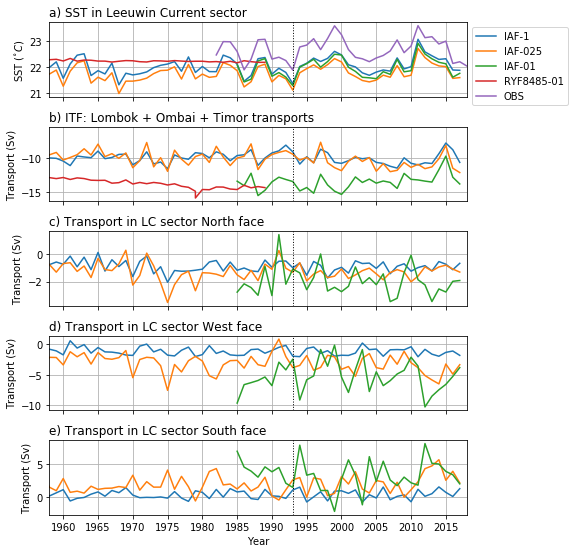

In [69]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

fig = plt.figure(1, figsize=(7.48,9.06)) 
# fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=5
col=1

ax = plt.subplot(row, col, 1)
plt.plot(sst_1_LC.year, sst_1_LC, label='IAF-1')
plt.plot(sst_025_LC.year, sst_025_LC, label='IAF-025')
plt.plot(sst_01_LC.year, sst_01_LC, label='IAF-01')
plt.plot(sst_JRA_LC.year, sst_JRA_LC, label='RYF8485-01')
plt.plot(sst_LC.year, sst_LC, label='OBS')
plt.grid()
plt.title('a) SST in Leeuwin Current sector', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
plt.legend(bbox_to_anchor=(1.0,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('SST ($^{\circ}C$)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 2)
plt.plot(trans_ITF_1.year, trans_ITF_1, label='IAF-1')
plt.plot(trans_ITF_025.year, trans_ITF_025, label='IAF-025')
plt.plot(trans_ITF_01.year, trans_ITF_01, label='IAF-01')
plt.plot(trans_ITF_JRA.year, trans_ITF_JRA, label='RYF8485-01')
plt.grid()
plt.title('b) ITF: Lombok + Ombai + Timor transports', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 3)
plt.plot(trans_LC_north_1.year, trans_LC_north_1, label='IAF-1')
plt.plot(trans_LC_north_025.year, trans_LC_north_025, label='IAF-025')
plt.plot(trans_LC_north_01.year, trans_LC_north_01, label='IAF-01')
# plt.plot(trans_LC_north_JRA.year, trans_LC_north_JRA, label='RYF8485-01')
plt.grid()
plt.title('c) Transport in LC sector North face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 4)
plt.plot(trans_LC_west_1.year, trans_LC_west_1, label='IAF-1')
plt.plot(trans_LC_west_025.year, trans_LC_west_025, label='IAF-025')
plt.plot(trans_LC_west_01.year, trans_LC_west_01, label='IAF-01')
# plt.plot(trans_LC_west_JRA.year, trans_LC_west_JRA, label='RYF8485-01')
plt.grid()
plt.title('d) Transport in LC sector West face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 5)
plt.plot(trans_LC_south_1.year, trans_LC_south_1, label='IAF-1')
plt.plot(trans_LC_south_025.year, trans_LC_south_025, label='IAF-025')
plt.plot(trans_LC_south_01.year, trans_LC_south_01, label='IAF-01')
# plt.plot(trans_LC_west_JRA.year, trans_LC_west_JRA, label='RYF8485-01')
plt.grid()
plt.title('e) Transport in LC sector South face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

hspace = +0.4
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

# savefigure('timeseries_LC')

In [39]:
sst_EAC = xr.open_dataset(input_path_obs + 'sst_EAC.nc').sst_EAC
print(sst_EAC)
sst_1_EAC = xr.open_dataset(input_path_mod + 'sst_1_EAC.nc').sst_1_EAC
print(sst_1_EAC)
sst_025_EAC = xr.open_dataset(input_path_mod + 'sst_025_EAC.nc').sst_025_EAC
print(sst_025_EAC)
sst_01_EAC = xr.open_dataset(input_path_mod + 'sst_01_EAC.nc').sst_01_EAC
print(sst_01_EAC)
sst_JRA_EAC = xr.open_dataset(input_path_mod + 'sst_JRA_EAC.nc').sst_JRA_EAC
print(sst_JRA_EAC)

<xarray.DataArray 'sst_EAC' (year: 37)>
array([16.307743, 15.994451, 16.007574, 16.384548, 16.26546 , 16.33474 ,
       16.619678, 16.956247, 16.637419, 16.303984, 16.233488, 16.448383,
       15.996965, 15.851464, 15.80007 , 16.4649  , 16.707935, 17.019768,
       16.779787, 17.141195, 16.803822, 16.702295, 16.317692, 16.926527,
       16.529512, 16.955814, 16.433882, 16.490053, 17.00011 , 16.756447,
       16.647795, 17.090094, 17.291588, 17.192186, 17.571009, 17.516544,
       17.136072], dtype=float32)
Coordinates:
  * year     (year) int64 1982 1983 1984 1985 1986 ... 2014 2015 2016 2017 2018
<xarray.DataArray 'sst_1_EAC' (year: 300)>
array([15.958466, 16.598175, 16.10376 , ..., 15.593475, 16.036102, 16.056915],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'sst_025_EAC' (year: 300)>
array([16.075256, 16.378632, 16.029877, ..., 16.279053, 16.62909 , 16.66092 ],
      dtype=float32)
Coordinates:
 

In [16]:
# trans_hov_line_157E_1 = xr.open_dataset(input_path_mod + 'trans_hov_line_157E_1.nc').trans_hov_line_157E_1/1e6/1036
# print(trans_hov_line_157E_1)
# trans_hov_line_157E_025 = xr.open_dataset(input_path_mod + 'trans_hov_line_157E_025.nc').trans_hov_line_157E_025/1e6/1036
# print(trans_hov_line_157E_025)
# trans_hov_line_157E_01 = xr.open_dataset(input_path_mod + 'trans_hov_line_157E_01.nc').trans_hov_line_157E_01/1e6/1036
# print(trans_hov_line_157E_01)
# trans_hov_line_157E_JRA = xr.open_dataset(input_path_mod + 'trans_hov_line_157E_JRA.nc').trans_hov_line_157E_JRA/1e6/1036
# print(trans_hov_line_157E_JRA)

trans_hov_EAC_north_1 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_north_1.nc').trans_hov_EAC_north_1/1e6/1036
print(trans_hov_EAC_north_1)
trans_hov_EAC_north_025 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_north_025.nc').trans_hov_EAC_north_025/1e6/1036
print(trans_hov_EAC_north_025)
trans_hov_EAC_north_01 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_north_01.nc').trans_hov_EAC_north_01/1e6/1036
print(trans_hov_EAC_north_01)
trans_hov_EAC_north_JRA = xr.open_dataset(input_path_mod + 'trans_hov_EAC_north_JRA.nc').trans_hov_EAC_north_JRA/1e6/1036
print(trans_hov_EAC_north_JRA)

# trans_hov_EAC_east_1 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_east_1.nc').trans_hov_EAC_east_1/1e6/1036
# print(trans_hov_EAC_east_1)
# trans_hov_EAC_east_025 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_east_025.nc').trans_hov_EAC_east_025/1e6/1036
# print(trans_hov_EAC_east_025)
# trans_hov_EAC_east_01 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_east_01.nc').trans_hov_EAC_east_01/1e6/1036
# print(trans_hov_EAC_east_01)
# trans_hov_EAC_east_JRA = xr.open_dataset(input_path_mod + 'trans_hov_EAC_east_JRA.nc').trans_hov_EAC_east_JRA/1e6/1036
# print(trans_hov_EAC_east_JRA)

# trans_hov_EAC_south_1 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_south_1.nc').trans_hov_EAC_south_1/1e6/1036
# print(trans_hov_EAC_south_1)
# trans_hov_EAC_south_025 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_south_025.nc').trans_hov_EAC_south_025/1e6/1036
# print(trans_hov_EAC_south_025)
# trans_hov_EAC_south_01 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_south_01.nc').trans_hov_EAC_south_01/1e6/1036
# print(trans_hov_EAC_south_01)
# trans_hov_EAC_south_JRA = xr.open_dataset(input_path_mod + 'trans_hov_EAC_south_JRA.nc').trans_hov_EAC_south_JRA/1e6/1036
# print(trans_hov_EAC_south_JRA)

# trans_hov_EAC_west_1 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_west_1.nc').trans_hov_EAC_west_1/1e6/1036
# print(trans_hov_EAC_west_1)
# trans_hov_EAC_west_025 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_west_025.nc').trans_hov_EAC_west_025/1e6/1036
# print(trans_hov_EAC_west_025)
# trans_hov_EAC_west_01 = xr.open_dataset(input_path_mod + 'trans_hov_EAC_west_01.nc').trans_hov_EAC_west_01/1e6/1036
# print(trans_hov_EAC_west_01)
# trans_hov_EAC_west_JRA = xr.open_dataset(input_path_mod + 'trans_hov_EAC_west_JRA.nc').trans_hov_EAC_west_JRA/1e6/1036
# print(trans_hov_EAC_west_JRA)

<xarray.DataArray 'trans_hov_EAC_north_1' (year: 300, xt_ocean: 10)>
array([[      nan,       nan,       nan, ..., -6.331694, -4.43396 , -1.219467],
       [      nan,       nan,       nan, ..., -5.823208, -4.267066, -1.536954],
       [      nan,       nan,       nan, ..., -5.582971, -4.268172, -1.712995],
       ...,
       [      nan,       nan,       nan, ..., -4.890599, -3.626789, -1.428587],
       [      nan,       nan,       nan, ..., -5.043648, -3.708624, -1.332982],
       [      nan,       nan,       nan, ..., -4.089705, -2.909886, -0.896036]],
      dtype=float32)
Coordinates:
  * year      (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
  * xt_ocean  (xt_ocean) float64 -212.5 -211.5 -210.5 ... -205.5 -204.5 -203.5
<xarray.DataArray 'trans_hov_EAC_north_025' (year: 300, xt_ocean: 40)>
array([[      nan,       nan,       nan, ...,  0.050545,  0.744541,  1.742937],
       [      nan,       nan,       nan, ..., -0.402762, -0.400969, -0.262944],
       [     

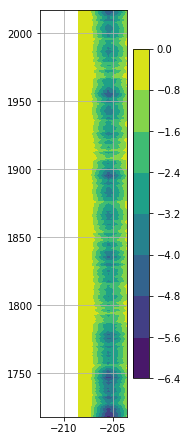

In [17]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=1
col=4

ax = plt.subplot(row, col, 1)
levels = 1
plt.contourf(trans_hov_EAC_north_1.xt_ocean, trans_hov_EAC_north_1.year, trans_hov_EAC_north_1, label='IAF-1')
plt.colorbar()
plt.grid()


# ax = plt.subplot(row, col, 2)
# plt.plot(trans_line_157E_1.year, trans_line_157E_1, label='IAF-1')
# plt.plot(trans_line_157E_025.year, trans_line_157E_025, label='IAF-025')
# plt.plot(trans_line_157E_01.year, trans_line_157E_01, label='IAF-01')
# plt.plot(trans_line_157E_JRA.year, trans_line_157E_JRA, label='RYF8485-01')
# plt.grid()
# plt.title('b) Transport north of the EAC along 157E', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# # plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
# # plt.xlabel('Year')
# plt.ylabel('Transport (Sv)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


# ax = plt.subplot(row, col, 3)
# plt.plot(trans_EAC_north_1.year, trans_EAC_north_1, label='IAF-1')
# plt.plot(trans_EAC_north_025.year, trans_EAC_north_025, label='IAF-025')
# plt.plot(trans_EAC_north_01.year, trans_EAC_north_01, label='IAF-01')
# plt.plot(trans_EAC_north_JRA.year, trans_EAC_north_JRA, label='RYF8485-01')
# plt.grid()
# plt.title('c) Transport in EAC sector North face', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# # plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
# # plt.xlabel('Year')
# plt.ylabel('Transport (Sv)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


# ax = plt.subplot(row, col, 4)
# plt.plot(trans_EAC_east_1.year, trans_EAC_east_1, label='IAF-1')
# plt.plot(trans_EAC_east_025.year, trans_EAC_east_025, label='IAF-025')
# plt.plot(trans_EAC_east_01.year, trans_EAC_east_01, label='IAF-01')
# plt.plot(trans_EAC_east_JRA.year, trans_EAC_east_JRA, label='RYF8485-01')
# plt.grid()
# plt.title('d) Transport in EAC sector East face', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# # plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
# # plt.xlabel('Year')
# plt.ylabel('Transport (Sv)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


# ax = plt.subplot(row, col, 5)
# plt.plot(trans_EAC_south_1.year, trans_EAC_south_1, label='IAF-1')
# plt.plot(trans_EAC_south_025.year, trans_EAC_south_025, label='IAF-025')
# plt.plot(trans_EAC_south_01.year, trans_EAC_south_01, label='IAF-01')
# plt.plot(trans_EAC_south_JRA.year, trans_EAC_south_JRA, label='RYF8485-01')
# plt.grid()
# plt.title('e) Transport in EAC sector South face', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# # plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
# # plt.xlabel('Year')
# plt.ylabel('Transport (Sv)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)


# ax = plt.subplot(row, col, 6)
# plt.plot(trans_EAC_west_1.year, trans_EAC_west_1, label='IAF-1')
# plt.plot(trans_EAC_west_025.year, trans_EAC_west_025, label='IAF-025')
# plt.plot(trans_EAC_west_01.year, trans_EAC_west_01, label='IAF-01')
# plt.plot(trans_EAC_west_JRA.year, trans_EAC_west_JRA, label='RYF8485-01')
# plt.grid()
# plt.title('f) Transport in EAC sector West face (south of Tasmania)', loc='left')
# plt.xticks(np.arange(1720,2020,20))
# plt.xlim([1718,2018])
# # plt.legend(bbox_to_anchor=(1.21,1))
# # ax.set_xticklabels('')
# plt.xlabel('Year')
# plt.ylabel('Transport (Sv)')
# plt.axvline(1718+60, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*2, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*3, c='k', linestyle='--', linewidth=1)
# plt.axvline(1718+60*4, c='k', linestyle='--', linewidth=1)




# hspace = +0.5
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

# savefigure('timeseries_EAC_all')

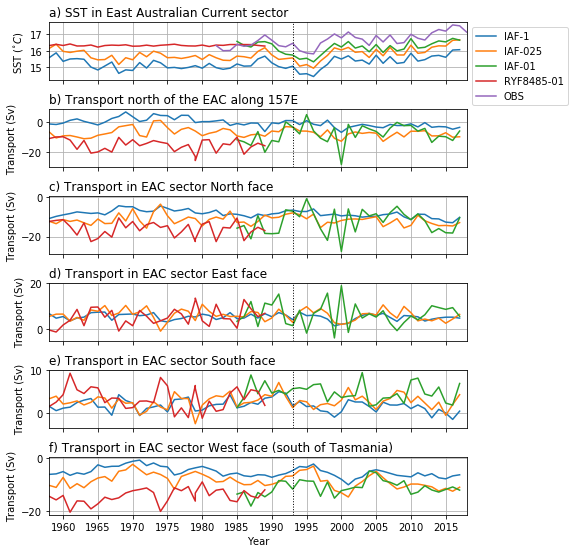

In [68]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

fig = plt.figure(1, figsize=(7.48,9.06)) 
# fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

# plt.suptitle(
#     r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
#     '\n(a,b,c) the model and in (d) the observations',
#     x=0.2,y=1.025, ha='left')

row=6
col=1

ax = plt.subplot(row, col, 1)
plt.plot(sst_1_EAC.year, sst_1_EAC, label='IAF-1')
plt.plot(sst_025_EAC.year, sst_025_EAC, label='IAF-025')
plt.plot(sst_01_EAC.year, sst_01_EAC, label='IAF-01')
plt.plot(sst_JRA_EAC.year, sst_JRA_EAC, label='RYF8485-01')
plt.plot(sst_EAC.year, sst_EAC, label='OBS')
plt.grid()
plt.title('a) SST in East Australian Current sector', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
plt.legend(bbox_to_anchor=(1.0,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('SST ($^{\circ}C$)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 2)
plt.plot(trans_line_157E_1.year, trans_line_157E_1, label='IAF-1')
plt.plot(trans_line_157E_025.year, trans_line_157E_025, label='IAF-025')
plt.plot(trans_line_157E_01.year, trans_line_157E_01, label='IAF-01')
plt.plot(trans_line_157E_JRA.year, trans_line_157E_JRA, label='RYF8485-01')
plt.grid()
plt.title('b) Transport north of the EAC along 157E', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 3)
plt.plot(trans_EAC_north_1.year, trans_EAC_north_1, label='IAF-1')
plt.plot(trans_EAC_north_025.year, trans_EAC_north_025, label='IAF-025')
plt.plot(trans_EAC_north_01.year, trans_EAC_north_01, label='IAF-01')
plt.plot(trans_EAC_north_JRA.year, trans_EAC_north_JRA, label='RYF8485-01')
plt.grid()
plt.title('c) Transport in EAC sector North face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 4)
plt.plot(trans_EAC_east_1.year, trans_EAC_east_1, label='IAF-1')
plt.plot(trans_EAC_east_025.year, trans_EAC_east_025, label='IAF-025')
plt.plot(trans_EAC_east_01.year, trans_EAC_east_01, label='IAF-01')
plt.plot(trans_EAC_east_JRA.year, trans_EAC_east_JRA, label='RYF8485-01')
plt.grid()
plt.title('d) Transport in EAC sector East face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 5)
plt.plot(trans_EAC_south_1.year, trans_EAC_south_1, label='IAF-1')
plt.plot(trans_EAC_south_025.year, trans_EAC_south_025, label='IAF-025')
plt.plot(trans_EAC_south_01.year, trans_EAC_south_01, label='IAF-01')
plt.plot(trans_EAC_south_JRA.year, trans_EAC_south_JRA, label='RYF8485-01')
plt.grid()
plt.title('e) Transport in EAC sector South face', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
ax.set_xticklabels('')
# plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)

ax = plt.subplot(row, col, 6)
plt.plot(trans_EAC_west_1.year, trans_EAC_west_1, label='IAF-1')
plt.plot(trans_EAC_west_025.year, trans_EAC_west_025, label='IAF-025')
plt.plot(trans_EAC_west_01.year, trans_EAC_west_01, label='IAF-01')
plt.plot(trans_EAC_west_JRA.year, trans_EAC_west_JRA, label='RYF8485-01')
plt.grid()
plt.title('f) Transport in EAC sector West face (south of Tasmania)', loc='left')
plt.xticks(np.arange(1920,2020,5))
plt.xlim([1958,2018])
# plt.legend(bbox_to_anchor=(1.21,1))
# ax.set_xticklabels('')
plt.xlabel('Year')
plt.ylabel('Transport (Sv)')
plt.axvline(1993, c='k', linestyle=':', linewidth=1)


hspace = +0.5
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=hspace)

savefigure('timeseries_EAC')

In [10]:
straits_01deg = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('Lombok Strait', [-244.3, -243.8, -8.37, -8.37]),
            ('Ombai Strait',  [-234.9, -234.9, -8.86, -8.27]),
            ('Timor Strait',  [-232.6, -232.6, -13.96, -8.37])
            ])
straits_025deg = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('Lombok Strait', [-244.5, -243.5, -8.22, -8.22]),
            ('Ombai Strait',  [-235.5, -235.5, -9.21, -8.47]),
            ('Timor Strait',  [-233, -233, -13.86, -8.71])
            ])
straits_1deg = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('Lombok Strait', [-245, -242, -8.33, -8.33]),
            ('Ombai Strait',  [-237, -237, -10.33, -8.33]),
            ('Timor Strait',  [-233, -233, -13.9, -9])
            ])


lonW_LC = 110
lonE_LC = 119
latS_LC = -34
latN_LC = -20

latN_157E = -20

lonW_EAC = 147
lonE_EAC = 157
latS_EAC = -47
latN_EAC = -33

In [ ]:
input_path_obs = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

output_path_obs = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

In [105]:
sst = xr.open_dataset(input_path_obs + 'sst.mnmean.nc').\
                sst.\
                sel(lon=slice(lonW_LC,lonE_LC)).\
                sel(lat=slice(latS_LC,latN_LC,-1)).\
                groupby('time.year').\
                mean('time', skipna=True)

sst = sst.assign_coords(lon=sst.lon-360)
print(sst)
mask = xr.open_dataset(input_path_obs + 'lsmask.nc').\
                mask.\
                sel(lon=slice(lonW_LC,lonE_LC)).\
                sel(lat=slice(latS_LC,latN_LC,-1))

mask = mask.assign_coords(lon=mask.lon-360)

sst = sst.where(mask==1, np.nan)

sst_LC = sst.mean('lon').mean('lat').squeeze()
print(sst_LC)

<xarray.DataArray 'sst' (year: 39, lat: 14, lon: 9)>
array([[[17.07    , 17.52    , ..., 18.8     , 18.74    ],
        [17.96    , 18.38    , ..., 19.31    , 19.21    ],
        ...,
        [24.109999, 24.279999, ..., 26.539999, 26.67    ],
        [24.64    , 24.869999, ..., 26.83    , 26.96    ]],

       [[17.481667, 17.924166, ..., 18.610832, 18.109999],
        [18.225834, 18.693335, ..., 19.590834, 19.311666],
        ...,
        [24.544167, 24.909998, ..., 26.761665, 26.754997],
        [25.068335, 25.408333, ..., 27.009165, 27.040833]],

       ...,

       [[17.701666, 18.058332, ..., 19.047499, 18.725   ],
        [18.369165, 18.696669, ..., 19.763332, 19.558332],
        ...,
        [24.349998, 24.680834, ..., 25.723335, 25.765831],
        [24.770834, 25.103333, ..., 25.885832, 25.945831]],

       [[19.599998, 19.555   , ..., 20.239998, 20.265   ],
        [20.14    , 20.06    , ..., 20.795   , 20.885   ],
        ...,
        [25.135   , 25.47    , ..., 28.805   , 29.

In [109]:
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
print(tstart)
print(tend)
print(expt)
print(n_files)
print(time_units)
print(offset)

sst_1 = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=None,
                        time_units=time_units, offset=offset).\
                        isel(st_ocean=0).\
                        sel(xt_ocean=slice(lonW_LC-360,lonE_LC-360)).\
                        sel(yt_ocean=slice(latS_LC,latN_LC)).\
                        mean('xt_ocean').\
                        mean('yt_ocean')

sst_1.load()

sst_1_LC = sst_1.groupby('time.year').mean('time', skipna=True)
print(sst_1_LC)

1993-01-01 00:00:00
2018-01-01 00:00:00
1deg_jra55v13_iaf_spinup1_B1
-12
days since 1718-01-01
-87658
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
<xarray.DataArray 'temp' (year: 300)>
array([295.43625, 295.15527, 294.6702 , ..., 295.46814, 295.03473, 295.02307],
      dtype=float32)
Coordinates:
    st_ocean  float64 1.152
  * year      (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017


In [111]:
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
print(tstart)
print(tend)
print(expt)
print(n_files)
print(time_units)
print(offset)

sst_025 = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=None,
                        time_units=time_units, offset=offset).\
                        isel(st_ocean=0).\
                        sel(xt_ocean=slice(lonW_LC-360,lonE_LC-360)).\
                        sel(yt_ocean=slice(latS_LC,latN_LC)).\
                        mean('xt_ocean').\
                        mean('yt_ocean')

sst_025.load()

sst_025_LC = sst_025.groupby('time.year').mean('time', skipna=True)
print(sst_025_LC)

1993-01-01 00:00:00
2018-01-01 00:00:00
025deg_jra55v13_iaf_gmredi6
-34
days since 1718-01-01
-87658
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
<xarray.DataArray 'temp' (year: 300)>
array([295.07068, 295.00967, 294.38626, ..., 295.16492, 294.71225, 294.74265],
      dtype=float32)
Coordinates:
    st_ocean  float64 1.152
  * year      (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017


In [112]:
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
print(tstart)
print(tend)
print(expt)
print(n_files)
print(time_units)
print(offset)

sst_01_month = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=None,
                        time_units=time_units, offset=offset).\
                        isel(st_ocean=0).\
                        sel(xt_ocean=slice(lonW_LC-360,lonE_LC-360)).\
                        sel(yt_ocean=slice(latS_LC,latN_LC)).\
                        mean('xt_ocean').\
                        mean('yt_ocean')

sst_01_month.load()
print(sst_01_month)

sst_01_LC = sst_01_month.groupby('time.year').mean('time', skipna=True)
print(sst_01_LC)

1993-01-01 00:00:00
2018-01-01 00:00:00
01deg_jra55v13_iaf
None
days since 0001-01-01
None
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
<xarray.DataArray 'temp' (time: 396)>
array([295.6129 , 297.45694, 297.72668, ..., 292.97552, 294.139  , 295.14398],
      dtype=float32)
Coordinates:
    st_ocean  float64 0.5413
  * time      (time) datetime64[ns] 1985-01-14T12:00:00 ... 2017-12-14T12:00:00
<xarray.DataArray 'temp' (year: 33)>
array([295.23044, 294.57498, 294.68253, 295.38174, 295.47363, 294.79443,
       294.93564, 294.7612 , 294.43274, 295.14282, 295.2787 , 295.44748,
       295.14554, 295.35855, 295.6413 , 295.61072, 295.14108, 294.98083,
       294.75385, 294.73404, 294.70175, 294.96988, 294.86792, 295.44388,
       294.96417, 295.0071 , 296.0614 , 295.65005, 295.4658 , 295.33093,
       295.27408, 294.75723, 294.90707], dtype=float32)
Coordinates:
    st_ocean  float64 0.5413
  * year      (year) int64 1985 1986 1987 1988 1989 ... 2013 2014

In [115]:
time_units = 'days since 0001-01-01'
print(time_units)

sst_JRA_month = cc.get_nc_variable('01deg_jra55v13_ryf8485_spinup6', 'ocean.nc', 'temp',
                        chunks={'st_ocean': None},
                        time_units=time_units).\
                        isel(st_ocean=0).\
                        sel(xt_ocean=slice(lonW_LC-360,lonE_LC-360)).\
                        sel(yt_ocean=slice(latS_LC,latN_LC)).\
                        mean('xt_ocean').\
                        mean('yt_ocean')

sst_JRA_month.load()



sst_JRA1 = sst_JRA_month.isel(time=slice(0,418)).\
                        groupby('time.year').mean('time', skipna=True)-273.15
sst_JRA1 = sst_JRA1.assign_coords(year = sst_JRA1.year.values + 1944)
print(sst_JRA1.year.values)



sst_JRA2 = sst_JRA_month.isel(time=slice(446,-8))
sst_JRA2 = sst_JRA2.assign_coords(time = pd.to_datetime(sst_JRA2.time.values))
sst_JRA2 = sst_JRA2.groupby('time.year').mean('time', skipna=True)-273.15
print(sst_JRA2.year.values)
sst_JRA2 = sst_JRA2.assign_coords(year = sst_JRA2.year.values + 44)
print(sst_JRA2.year.values)



sst_JRA_LC = xr.concat([sst_JRA1, sst_JRA2], dim='year')
print(sst_JRA_LC)

days since 0001-01-01
Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db
[1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981]
[1938 1939 1940 1941 1942 1943 1944 1945]
[1982 1983 1984 1985 1986 1987 1988 1989]
<xarray.DataArray 'temp' (year: 45)>
array([22.412842, 22.169128,       inf, 22.088043, 22.062134, 22.189758,
       22.221893, 22.206787, 22.296326, 22.30429 , 22.296936, 22.236938,
       22.232788, 22.27893 , 22.296143, 22.231293, 22.329407, 22.225372,
       22.267212, 22.26001 , 22.227753, 22.225952, 22.190521, 22.220825,
       22.247162, 22.239594, 22.203674, 22.192932, 22.240234, 22.234467,
       22.21936 , 22.24643 , 22.228027, 22.212708, 22.22116 , 22.22168 ,
       22.196869, 22.208313, 22.181519, 22.219452, 22.161377, 22.241821,
       22.205078, 22.1792  , 22.180145], dtype=float32)
Coordinates:
    

In [ ]:
# sst_1_xr = xr.DataArray(sst_1.transpose('yt_ocean', 'xt_ocean', 'time'), name='sst_1',
#                         coords=[lat_1, lon_1, year], 
#                         dims=['yt_ocean', 'xt_ocean', 'time'])
# print(sst_1_xr)
# sst_1_xr.to_netcdf(output_path + 'sst_1.nc')

# sst_1_slopes_xr = xr.DataArray(sst_1_slopes, name='sst_1_slopes',
#                         coords=[lat_1, lon_1], 
#                         dims=['yt_ocean', 'xt_ocean'])
# print(sst_1_slopes_xr)
# sst_1_slopes_xr.to_netcdf(output_path + 'sst_1_slopes.nc')



# sst_025_xr = xr.DataArray(sst_025.transpose('yt_ocean', 'xt_ocean', 'time'), name='sst_025',
#                         coords=[lat_025, lon_025, year], 
#                         dims=['yt_ocean', 'xt_ocean', 'time'])
# print(sst_025_xr)
# sst_025_xr.to_netcdf(output_path + 'sst_025.nc')

# sst_025_slopes_xr = xr.DataArray(sst_025_slopes, name='sst_025_slopes',
#                         coords=[lat_025, lon_025], 
#                         dims=['yt_ocean', 'xt_ocean'])
# print(sst_025_slopes_xr)
# sst_025_slopes_xr.to_netcdf(output_path + 'sst_025_slopes.nc')



sst_01_xr = xr.DataArray(sst_01.transpose('yt_ocean', 'xt_ocean', 'year'), name='sst_01',
                        coords=[lat_01, lon_01, year], 
                        dims=['yt_ocean', 'xt_ocean', 'year'])
print(sst_01_xr)
sst_01_xr.to_netcdf(output_path + 'sst_01.nc')

sst_01_slopes_xr = xr.DataArray(sst_01_slopes, name='sst_01_slopes',
                        coords=[lat_01, lon_01], 
                        dims=['yt_ocean', 'xt_ocean'])
print(sst_01_slopes_xr)
sst_01_slopes_xr.to_netcdf(output_path + 'sst_01_slopes.nc')

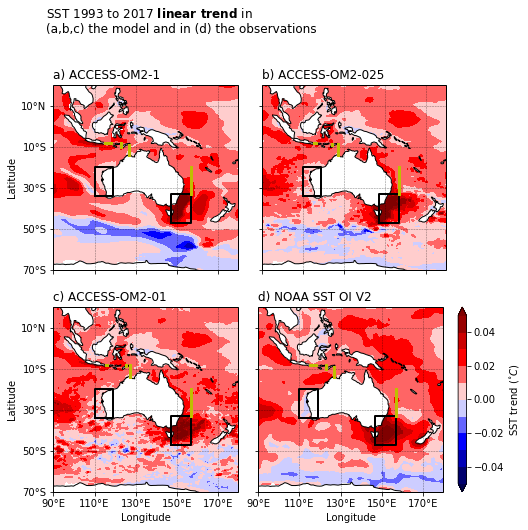

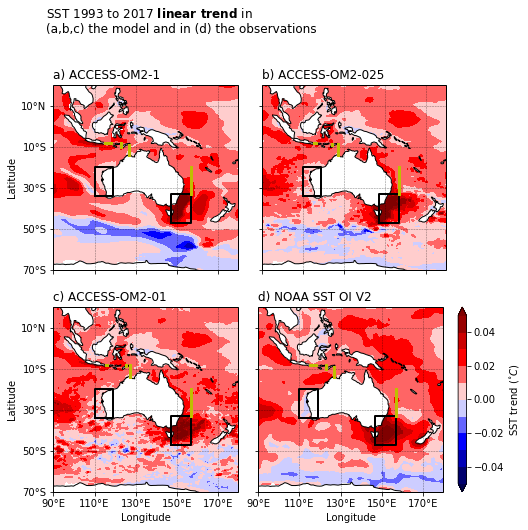

In [27]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ trend}$ in ' +
    '\n(a,b,c) the model and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.05,0.05,0.01)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_025deg['Lombok Strait'][0]+360, straits_025deg['Lombok Strait'][1]+360],
    [straits_025deg['Lombok Strait'][2], straits_025deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Ombai Strait'][0]+360, straits_025deg['Ombai Strait'][1]+360],
    [straits_025deg['Ombai Strait'][2], straits_025deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Timor Strait'][0]+360, straits_025deg['Timor Strait'][1]+360],
    [straits_025deg['Timor Strait'][2], straits_025deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_01deg['Lombok Strait'][0]+360, straits_01deg['Lombok Strait'][1]+360],
    [straits_01deg['Lombok Strait'][2], straits_01deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Ombai Strait'][0]+360, straits_01deg['Ombai Strait'][1]+360],
    [straits_01deg['Ombai Strait'][2], straits_01deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Timor Strait'][0]+360, straits_01deg['Timor Strait'][1]+360],
    [straits_01deg['Timor Strait'][2], straits_01deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)


wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trend_area')

In [74]:
##@memory.cache
def calc_transport(ekey, strait):
    """
    Calculate barotropic transport across a given 
     line of latitude or longitude.
     
    Designed for flow through straits.
    """
    
    expt = exptdata.exptdict[ekey]['expt']
    n = None #exptdata.exptdict[ekey]['n_files']
    time_units = exptdata.exptdict[ekey]['time_units']
    offset = exptdata.exptdict[ekey]['offset']
    
    print('Calculating {} {} transport'.format(expt, strait))
    print('with {} files, time units of {} and offset of  {} days'.format(n, time_units, offset))
    
    if ekey=='1deg':
        straits=straits_1deg
    if ekey=='025deg':
        straits=straits_025deg
    if ekey=='01deg':
        straits=straits_01deg
    
    xmin, xmax, ymin, ymax = straits[strait]
    
    if xmin == xmax:
        tx_trans = cc.get_nc_variable(expt, 
                                'ocean_month.nc', 
                                'tx_trans_int_z',
                                 n=n,
                                 time_units=time_units, offset=offset)
        
        transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .groupby('time.year')\
                            .sum('yt_ocean')

    elif ymin == ymax:
        ty_trans = cc.get_nc_variable(expt, 
                                      'ocean_month.nc', 
                                      'ty_trans_int_z',
                                      n=n,
                                      time_units=time_units, offset=offset)
        transport = ty_trans.sel(yu_ocean=ymin, method='nearest')\
                            .sel(xt_ocean=slice(xmin, xmax))\
                            .groupby('time.year')\
                            .sum('xt_ocean')
    else:
        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
    
    transport = transport.compute()
       
    return transport

### A plot for Indonesian Seas only

In [75]:
%%time
itf_straits = ['Lombok Strait', 'Ombai Strait',  'Timor Strait']
results = []
for ekey in exptdata.exptdict.keys():
    expt = exptdata.exptdict[ekey]['expt']
    desc = exptdata.exptdict[ekey]['desc']
    for i, strait in enumerate(itf_straits):
# convert from kg/s to Sv, assuming typical in-situ density of 1036kg/m^3
# https://www.nature.com/scitable/knowledge/library/key-physical-variables-in-the-ocean-temperature-102805293
        transport = calc_transport(ekey, strait)/1e6/1036
        transport_mean = transport.resample(time='A').mean('time')
        
        result = {'transport_mean': transport_mean,'expt': expt,'desc': desc,'i': i}
        results.append(result)

IPython.display.clear_output()

CPU times: user 5min 43s, sys: 2min 49s, total: 8min 32s
Wall time: 12min 48s


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous a

Text(0.5, 1.0, '(d) Timor Strait')

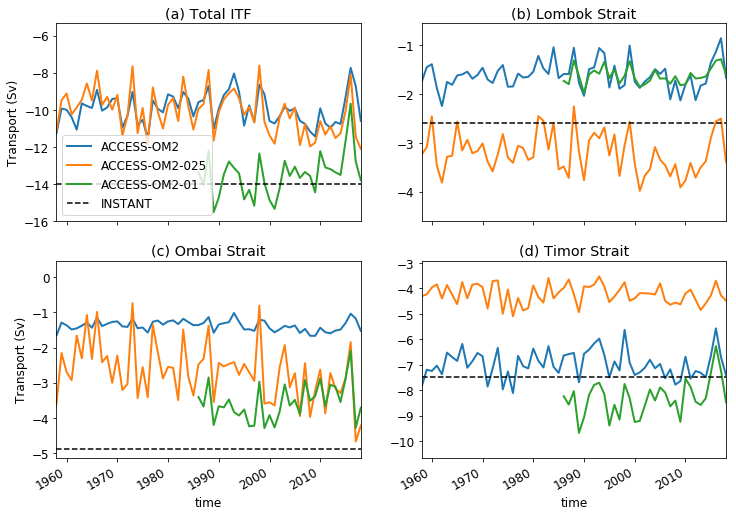

In [76]:
# def savefigure(fname):
#     plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
#     #plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
#     return   


plt.figure(figsize=(12,8))
for result in results:
    transport_mean = result['transport_mean']
    desc = result['desc']
    i = result['i']
    
    if i==0:
        total_transport = transport_mean
    else:
        total_transport = total_transport+transport_mean
        
    plt.subplot(2, 2, i+2)
    transport_mean.plot(label=desc, linewidth=2)
    plt.ylabel('')
    plt.gca().autoscale()

    if i ==2:
        plt.subplot(221)
        total_transport.plot(label=desc, linewidth=2)
        plt.title('(a) Total ITF')
        plt.ylabel('')
        plt.gca().autoscale()

for k in range(1,i+2,2):
    plt.subplot(2, 2, k)
    plt.ylabel('Transport (Sv)')

for k in range(1,3,1):
    plt.subplot(2, 2, k)
    plt.xlabel('')
    plt.gca().axes.xaxis.set_ticklabels([])

plt.subplot(221)
plt.plot([pd.datetime(1958,1,1),pd.datetime(2017,12,31)],[-14, -14],'k--',label="INSTANT")
plt.xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])
plt.legend()

plt.subplot(222)
plt.plot([pd.datetime(1958,1,1),pd.datetime(2017,12,31)],[-2.6, -2.6],'k--',label="INSTANT")
plt.xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])
plt.title('(b) '+itf_straits[0])

plt.subplot(223)
plt.plot([pd.datetime(1958,1,1),pd.datetime(2017,12,31)],[-4.9, -4.9],'k--',label="INSTANT")
plt.xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])
plt.title('(c) '+itf_straits[1])

plt.subplot(224)
plt.plot([pd.datetime(1958,1,1),pd.datetime(2017,12,31)],[-7.5, -7.5],'k--',label="INSTANT")
plt.xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])
plt.title('(d) '+itf_straits[2])

# savefigure('ITF_transport')

# Drake Passage Transport

In [7]:
%%time
strait = 'Drake Passage'
results = []
for ekey in exptdata.exptdict.keys():
    expt = exptdata.exptdict[ekey]['expt']
    desc = exptdata.exptdict[ekey]['desc']
    transport = calc_transport(ekey, strait)/1e6/1036
    transport_mean = transport.resample(time='A').mean('time')
    result = {'transport_mean': transport_mean,'expt': expt,'desc': desc}
    results.append(result)

IPython.display.clear_output()
    

CPU times: user 57.6 s, sys: 27.8 s, total: 1min 25s
Wall time: 2min 49s


In [8]:
def add_cycles(ax):
    cycle_dates = [1718, 1778, 1838, 1898, 1958, 2018]
    ylims=ax.get_ylim()
    for cd in cycle_dates:
        ax.plot([pd.datetime(cd,1,1),pd.datetime(cd,1,1)],ylims,'k--',linewidth=0.8)
    ax.set_ylim(ylims)

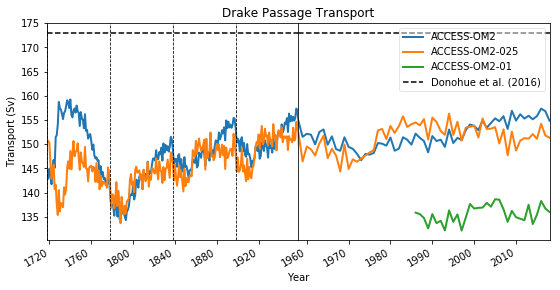

In [11]:
fig,ax = plt.subplots(1,2,figsize=(9,4))
fig.subplots_adjust(wspace=0.0)
for result in results:
    transport_mean = result['transport_mean']
    desc = result['desc']
    transport_mean.plot(ax = ax[0],label=desc, linewidth=2)
    transport_mean.plot(ax = ax[1],label=desc, linewidth=2)

    
ax[0].plot([pd.datetime(1718,1,1),pd.datetime(1957,12,31)],[173, 173],'k--',label="Donohue et al. (2016)")
ax[1].plot([pd.datetime(1958,1,1),pd.datetime(2017,12,31)],[173, 173],'k--',label="Donohue et al. (2016)")
l2=ax[1].legend(fancybox=True, framealpha=0.5)
ax[0].set_xlim([pd.datetime(1718,1,1),pd.datetime(1957,12,31)])
ax[1].set_xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])
ax[0].set_title('')
t2 = ax[1].set_title('Drake Passage Transport')
t2.set_position((0.0,1.0))
ax[0].set_xlabel('')
x2 = ax[1].set_xlabel('Year')
x2.set_position((0.0, 17.2))
ax[0].set_ylabel('Transport (Sv)')
ax[1].set_yticks([])
ax[1].set_ylabel('')

add_cycles(ax[0])

savefigure('DP_transport')

**Below here, not used for manuscript**
----

In [ ]:
ncols = 2
nrows = math.ceil(len(straits)/ncols)
tstart = 1e10
tend = -1e10
# transports = copy.deepcopy(exptdata.exptdict)  # this will store speed fields under the same keys as exptdata.exptdict
plt.figure(figsize=(12,10))
for ekey in exptdata.exptdict.keys():
    expt = exptdata.exptdict[ekey]['expt']
    desc = exptdata.exptdict[ekey]['desc']
    for i, strait in enumerate(straits):
# convert from kg/s to Sv, assuming typical in-situ density of 1036kg/m^3
# https://www.nature.com/scitable/knowledge/library/key-physical-variables-in-the-ocean-temperature-102805293
#        if ekey == '01deg':
#            transport = calc_transport(expt, strait,n=410)/1e6/1036
#             tstart = min(tstart, transport['time'].data[0])  # first time in model data
#             tend = max(tend, transport['time'].data[-1])  # final time in model data
#        else:
        transport = calc_transport(ekey, strait)/1e6/1036
        transport_mean = transport.resample(time='A').mean('time')
        plt.subplot(nrows, ncols, i+1)
        transport_mean.plot(label=desc+', annual mean', linewidth=2)
        #transport.plot(label=desc, linewidth=0.2, alpha=0.5)
        plt.title(strait)
        plt.ylabel('')
        plt.gca().autoscale()

for k in range(1,i+2,2):
    plt.subplot(nrows, ncols, k)
    plt.ylabel('Transport (Sv)')

for k in range(1,i,1):
    plt.subplot(nrows, ncols, k)
    plt.xlabel('')
    plt.gca().axes.xaxis.set_ticklabels([])

# for k in range(1,i+2,1):
#     plt.subplot(nrows, ncols, k)
#     plt.gca().xlim([tstart, tend])

plt.subplot(nrows, ncols, i+1)
plt.legend(bbox_to_anchor=(-0.1,-0.25), loc='upper center')

savefigure('strait_transports')

In [12]:
ekey = '025deg'
expt = exptdata.exptdict[ekey]['expt']
n = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
n=30
offset=0
tx_trans = cc.get_nc_variable(expt, 
                                'ocean_month.nc', 
                                'tx_trans_int_z',
                                 n=n,
                                 time_units=time_units, offset=offset)
        

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


ERROR:sqlalchemy.pool.StaticPool:Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/sqlalchemy/pool.py", line 709, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/sqlalchemy/pool.py", line 880, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/sqlalchemy/engine/default.py", line 459, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140512886740736 and this is thread id 140511030036224.
ERROR:sqlalchemy.pool.StaticPool:Exception closing connection <sqlite3.Connection object at 0x7fcb3461c570>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs

-3059819000.0


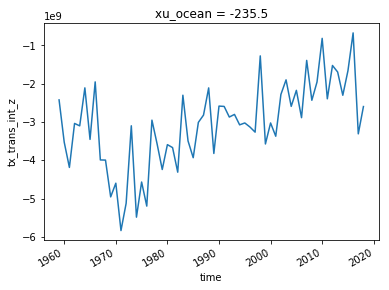

In [13]:
xmin, xmax, ymin, ymax = straits_025deg['Ombai Strait']

transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))

transport.sum('yt_ocean').resample(time='A').mean('time').plot()
print(transport.mean('time').sum('yt_ocean').values)


In [11]:
temp = transport.sum('yt_ocean').resample(time='A').mean('time')



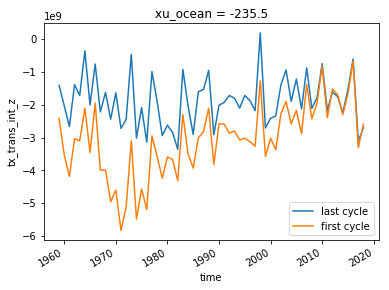

In [14]:
temp.plot(label='last cycle')
transport.sum('yt_ocean').resample(time='A').mean('time').plot(label='first cycle')
plt.legend()

In [6]:
n

-30